Adapted from https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Data Sourcing

In [4]:
# download dataset
!wget https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv

--2021-11-13 12:12:05--  https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5379605 (5.1M) [text/plain]
Saving to: ‘Marketing_Analysis.csv.1’

Marketing_Analysis. 100%[===================>]   5.13M  --.-KB/s    in 0.08s   

2021-11-13 12:12:05 (65.7 MB/s) - ‘Marketing_Analysis.csv.1’ saved [5379605/5379605]



In [5]:
# load and preview data
df = pd.read_csv("Marketing_Analysis.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#Data Cleaning

Notice that the correct header is from index 1. Reload the data and skip the first 2 rows.

In [22]:
# reload the data, skipping the first 2 rows
df = pd.read_csv("Marketing_Analysis.csv", skiprows=2)
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


It's good practice to make a copy instead of directly replacing the original DataFrame. If at any point you make a mistake, you still have the source DataFrame and don't have to reload the file.

In [23]:
new_df = df.copy()

Now if we observe the above dataset, the `customerid` column has of no importance to our analysis, and also the `jobedu` column has both the information of `job` and `education` in it.

So, what we’ll do is, we’ll drop the `customerid` column and we’ll split the `jobedu` column into two other columns `job` and `education` and after that, we’ll drop the `jobedu` column as well.

In [24]:
# drop the customerid column
new_df.drop("customerid", axis=1, inplace=True)

# extract job and eduation from jobedu
new_df["job"]= new_df["jobedu"].apply(lambda x: x.split(",")[0])
new_df["education"]= new_df["jobedu"].apply(lambda x: x.split(",")[1])

# drop the jobedu column
new_df.drop("jobedu", axis=1, inplace=True)

new_df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


If there are missing values in the dataset, we need to handle those missing values before doing any analysis.

In [25]:
# check for missing values
new_df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Handle missing values in `age` by dropping the rows.

In [26]:
# drop rows with missing age
new_df = new_df[~new_df.age.isnull()].copy()

# check missing values
new_df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Handle missing values in `month` by replacing the empty cells with mode.

In [27]:
# find month mode
mode = new_df.month.mode()[0]

# replace missing values with mode
new_df.month.fillna(mode, inplace=True)

# check missing values
new_df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Handle missing values in `response` by dropping the rows.

In [28]:
# drop rows with missing response
new_df = new_df[~new_df.response.isnull()].copy()

# check missing values
new_df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

##Handling Outliers
Outliers are the values that are far beyond the next nearest data points.
There are two types of outliers:
1. **Univariate outliers**: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.
2. **Multivariate outliers**: While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.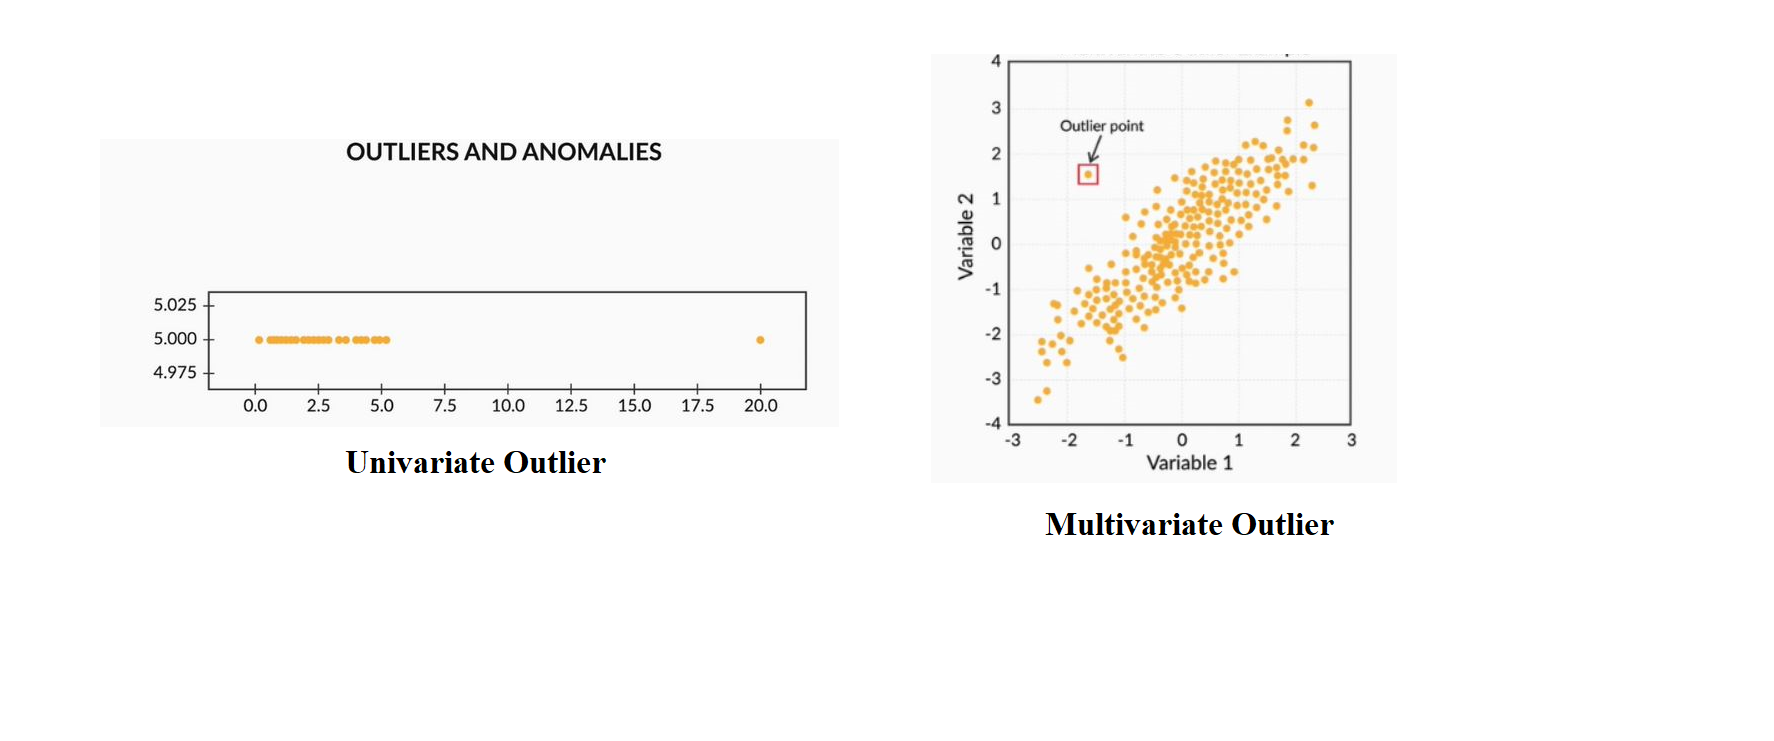

##Standardizing Values
To perform data analysis on a set of values, we have to make sure the values in the same column should be on the same scale. For example, if the data contains the values of the top speed of different companies’ cars, then the whole column should be either in meters/sec scale or miles/sec scale.

# Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

First, we analyze the job category by using bar plots because it's categorical data.

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64


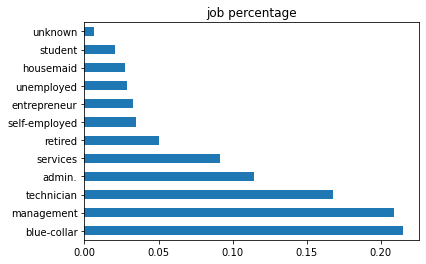

In [32]:
# calculate the percentage of each job
print(new_df.job.value_counts(normalize=True))

# plot the bar plot for job percentage
new_df.job.value_counts(normalize=True).plot(kind="barh", 
                                             title="job percentage")
plt.show()

Now, let's analyze education using pie chart.

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64


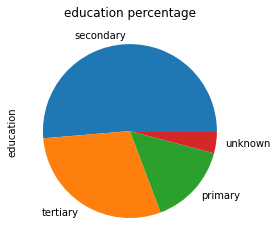

In [33]:
# calculate the percentage of each education
print(new_df.education.value_counts(normalize=True))

# plot the pie chart for education percentage
new_df.education.value_counts(normalize=True).plot(kind="pie", 
                                                   title="education percentage")
plt.show()

For numerical data, we can analyze them by calculating mean, median, std, etc. For example, we'll analyze the `salary` column.

In [34]:
# numerical data analysis
new_df.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

#Bivariate Analysis
If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

##Numerical-Numerical Analysis


1.   Scatter Plot
2.   Pair Plot
3. Correlation Matrix



###Scatter Plot
Plot `salary` against `balance` and `age` against `balance`.

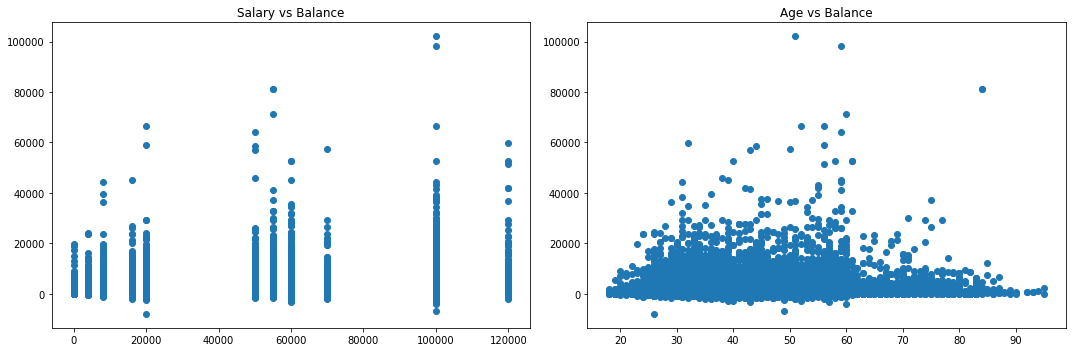

In [50]:
# create subplot
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# plot salary against balance
ax[0].scatter(new_df.salary, new_df.balance)
ax[0].set_title("Salary vs Balance")

# plot age against balance
ax[1].scatter(new_df.age, new_df.balance)
ax[1].set_title("Age vs Balance")

fig.tight_layout()

###Pair Plot
Now, let’s plot pair plots for the three columns we used in plotting scatter plots. We’ll use the `seaborn` library for plotting pair plots.

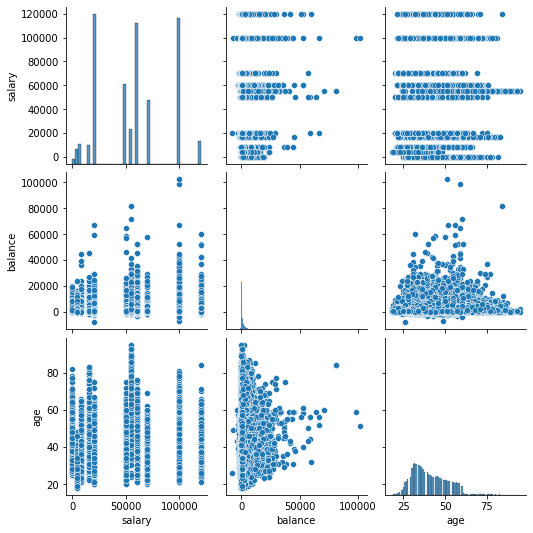

In [52]:
# plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data=new_df, vars=['salary','balance','age'])
plt.show()

###Correlation Matrix
Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

              age    salary   balance
age      1.000000  0.024513  0.097710
salary   0.024513  1.000000  0.055489
balance  0.097710  0.055489  1.000000


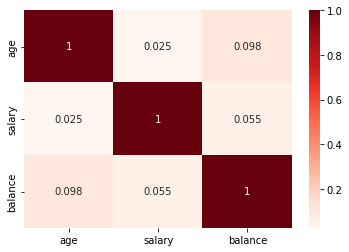

In [56]:
# calculating the correlation coefficient between age, salary, and balance
print(new_df[['age','salary','balance']].corr())

# plot the correlation matrix of age, salary, and balance
sns.heatmap(new_df[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

##Numerical-Categorical Analysis
Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.

Take `salary` and `response` from dataset to analyze.

In [57]:
# calculate mean between yes and no responses based on salary
new_df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

There is not much of a difference between the yes and no response based on the salary. Let’s calculate the median.

In [58]:
# calculate median between yes and no responses based on salary
new_df.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

By both mean and median we can say that the response of yes and no remains the same irrespective of the person’s salary. Let’s plot the box plot for them and check the behavior to confirm the hypothesis.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


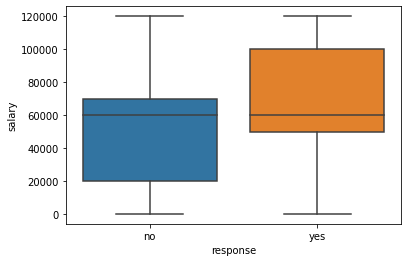

In [59]:
# plot box plot for salary and response
sns.boxplot(new_df.response, new_df.salary)
plt.show()

The box plot provides a different insight compared to mean and median. Customers who gave a positive response are on the higher salary side.


##Categorical-Categorical Analysis
Since our target column is `response`, we’ll see how the different categories like `education`, `marital`, etc. are associated with the `response` column. Instead of ‘yes’ and ‘no’ we will convert them into ‘1’ and ‘0’ to get the response rate.

In [60]:
# create new column: response_rate
# response_rate is numerical data type where response "yes"= 1, "no"= 0
new_df['response_rate'] = np.where(new_df.response=='yes', 1, 0)
new_df.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

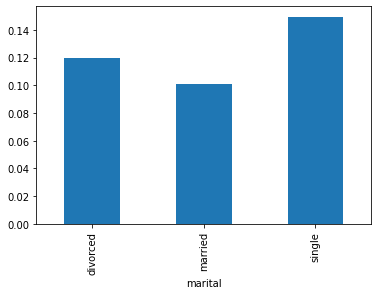

In [61]:
# plot the bar graph of marital status with average value of response_rate
new_df.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

By the above graph, we can infer that single members are more likely to give a positive response.

#Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Let’s see how `education`, `marital`, and `response_rate` correlate with each other.

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


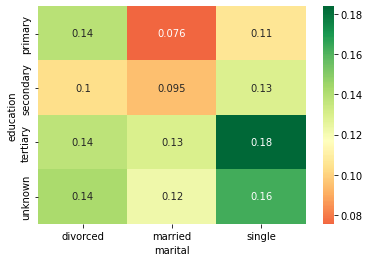

In [65]:
# create pivot table for education, marital, and response_rate
result = pd.pivot_table(data=new_df, index='education', columns='marital', values='response_rate')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Based on the heatmap we can infer that the **married people with primary education** are **less likely** to respond positively for the survey, while **single people with tertiary education** are **most likely** to respond positively to the survey.